In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal 

In [2]:
#Función para suavisar los datos
def rolling(y,n):  #recibe el vector y cuantos va a tomar para el promedio de suavisar
    y = pd.DataFrame(y)
    rolling = y.rolling(window = n , center = True , min_periods = 1)
    return  rolling.mean()

In [3]:
def correlation (y1,y2,y3): #datos a correlacionar y el tiempo
    npts = len(y3)
    lags = np.arange(-npts + 1, npts)
    x = np.linspace(np.min(y3), np.max(y3), npts)
    ccov = np.correlate(y1 - np.mean(y1), y2 - np.mean(y2), mode="full")
    ccor = ccov / (npts * np.std(y1) * np.std(y2))
    ccor = list(ccor)
    lags = list(lags)
    time_lag = ccor.index(min(ccor)) - lags.index(0)

    return ccor , ccov , lags, time_lag

In [4]:
#Cargar los datos
moscow = pd.read_csv("data/Moscow", delimiter= "\s+", skiprows=4 , skipfooter=1, names= ["year","hora", "count"])
newark = pd.read_csv("data/Newark", delimiter= "\s+", skiprows=4 , skipfooter=1, names= ["year","hora", "count"])
mcmurdo = pd.read_csv("data/Mcmurdo", delimiter= "\s+", skiprows=4 , skipfooter=1, names= ["year","hora", "count"])
ssn = pd.read_csv("data/SN_d_tot_V2.0.csv", delimiter = ";" , header= 0)
ssn_0 = np.array(ssn.ssn)
time = np.array(ssn.decimal)

C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
#Tratamiento de los datos

moscow.drop(columns= "hora") #eliminar colunma
moscow = np.array(moscow["count"])
moscow = np.where(moscow >10000, moscow * (9543. / 14342) , moscow )# arreglar datos
moscow[moscow <= 7500.] = np.NaN #quitar los de abajo

newark.drop(columns= "hora") #eliminar colunma
newark = np.array(newark["count"])
newark = np.where(newark >5000, newark * (3621. / 5927) , newark )# arreglar datos
newark[newark <= 2500.] = np.NaN #quitar los de abajo

mcmurdo.drop(columns= "hora") #eliminar colunma
mcmurdo = np.array(mcmurdo["count"])
mcmurdo = np.where(mcmurdo >15000, mcmurdo * (10097. / 16874) , mcmurdo )# arreglar datos
mcmurdo[mcmurdo <= 7400] = np.NaN #quitar los de abajo
mcmurdo[mcmurdo > 11000 ] = np.NaN

C:\Users\Miguel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater


In [6]:
# Normaliza los datos tal y como vienen
moscow_n = moscow*1. / np.nanmax(moscow)
newark_n = newark*1. / np.nanmax(newark)
mcmurdo_n = mcmurdo*1. / np.nanmax(mcmurdo)
ssn_0_n = ssn_0 * 1. / np.max(ssn_0)

In [7]:
#Suaviza los datos ns
moscow_n_s = rolling(pd.DataFrame(moscow_n).interpolate(),200)
newark_n_s = rolling(pd.DataFrame(newark_n).interpolate(),200)
mcmurdo_n_s = rolling(pd.DataFrame(mcmurdo_n).interpolate(),200)
ssn_0_n_s = rolling(pd.DataFrame(ssn_0_n).interpolate(),200)

In [8]:
#Suaviza los datos
moscow_s = rolling(pd.DataFrame(moscow).interpolate(),200)
newark_s = rolling(pd.DataFrame(newark).interpolate(),200)
mcmurdo_s = rolling(pd.DataFrame(mcmurdo).interpolate(),200)
ssn_0_s = rolling(pd.DataFrame(ssn_0).interpolate(),200)

In [9]:
# Normaliza los datos ss
moscow_s_n = moscow_s*1. / np.nanmax(moscow_s)
newark_s_n_n = newark_s*1. / np.nanmax(newark_s)
mcmurdo_s_n = mcmurdo_s*1. / np.nanmax(mcmurdo_s)
ssn_0_s_n = ssn_0_s * 1. / np.max(ssn_0_s)

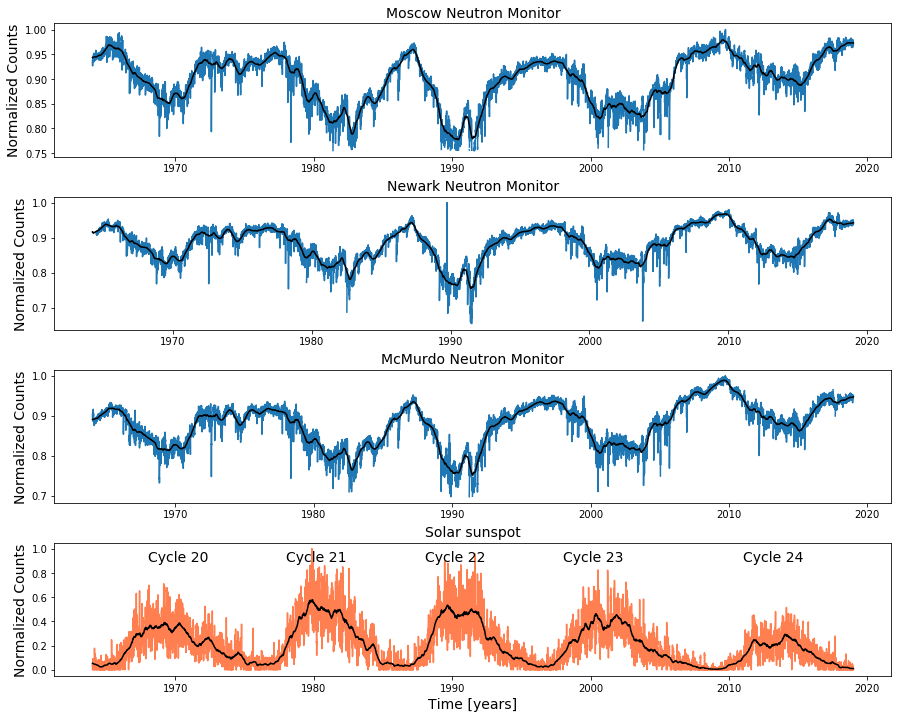

In [10]:
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.3)
plt.subplot(4, 1, 1)
plt.ylabel("Normalized Counts",fontsize=14)
plt.title("Moscow Neutron Monitor",fontsize=14)
plt.plot(time,moscow_n)
plt.plot(time,moscow_n_s, color = "k")
plt.subplot(4, 1, 2)
plt.ylabel("Normalized Counts",fontsize=14)
plt.plot(time,newark_n)
plt.title("Newark Neutron Monitor", fontsize=14)
plt.plot(time,newark_n_s, color = "k")
plt.subplot(4, 1, 3)
plt.ylabel("Normalized Counts",fontsize=14)
plt.title("McMurdo Neutron Monitor",fontsize=14)
plt.plot(time,mcmurdo_n)
plt.plot(time,mcmurdo_n_s, color = "k")
plt.subplot(4, 1, 4)
plt.ylabel("Normalized Counts",fontsize=14)
plt.plot(time,ssn_0_n, color = 'coral')
plt.plot(time,ssn_0_n_s, color = 'k')
plt.xlabel("Time [years]",fontsize=14)
plt.title("Solar sunspot",fontsize=14)
plt.text(1968,0.9, 'Cycle 20',fontsize=14 , color = 'k')
plt.text(1978,0.9, "Cycle 21",fontsize=14 , color = 'k')
plt.text(1988,0.9, "Cycle 22",fontsize=14 , color = 'k')
plt.text(1998,0.9, "Cycle 23",fontsize=14 , color = 'k')
plt.text(2011,0.9, "Cycle 24",fontsize=14 , color = 'k')
plt.show()

In [11]:
#time = list(time)
ciclos = [274,4443,8340,11903,16408,20090]
"""
v1---> Primer vector a correlacionar (lista)
v2---> Segundo vector a correlacionar (lista)
v3---> Tiempo (lista)
v4---> Ciclos (lista)
"""
def corr (v1,v2,v3,v4): 
    ccor_ = []
    time_lag_ = []
    for i in range(len(v4)-1):
        ccor, ccov, lags,time_lag= correlation(v1[v4[i]:v4[i+1]],v2[v4[i]:v4[i+1]],v3[v4[i]:v4[i+1]])
        ccor_.append(np.min(ccor))
        time_lag_.append(time_lag)
    ccor, ccov, lags,time_lag= correlation(v1[v4[0]:v4[-1]],v2[v4[0]:v4[-1]],v3[v4[0]:v4[-1]]) #solo los que comprenden los ciclos
    #ccor, ccov, lags,time_lag= correlation(v1,v2,v3) # de todos los datos
    ccor_.append(np.min(ccor))
    time_lag_.append(time_lag)
    return ccor_,time_lag_,lags,ccor

In [12]:
corr_moscow , time_lag_moscow, lags_moscow, ccor_moscow = corr(list(moscow_n_s[0]),list(ssn_0_n_s[0]), list(time),ciclos)
corr_newark , time_lag_newark, lags_newark, ccor_newark = corr(list(newark_n_s[0]),list(ssn_0_n_s[0]), list(time),ciclos)
corr_mcmurdo , time_lag_mcmurdo, lags_mcmurdo, ccor_mcmurdo = corr(list(mcmurdo_n_s[0]),list(ssn_0_n_s[0]), list(time),ciclos)

In [13]:
#Time_lags
pd.DataFrame(data = [time_lag_moscow, time_lag_newark,time_lag_mcmurdo],
             index = ["Moscow","Newark","McMurdo"],
            columns = ["Ciclo 20","Ciclo 21","Ciclo 22","Ciclo 23","Ciclo 24","Total"])

,Ciclo 20,Ciclo 21,Ciclo 22,Ciclo 23,Ciclo 24,Total
Moscow,19,322,0,163,0,168
Newark,27,305,0,144,0,143
McMurdo,0,333,0,171,18,169


In [14]:
#Correlaciones
pd.DataFrame(data = [corr_mcmurdo, corr_newark,corr_mcmurdo],
             index = ["Moscow","Newark","McMurdo"],
            columns = ["Ciclo 20","Ciclo 21","Ciclo 22","Ciclo 23","Ciclo 24","Total"])

,Ciclo 20,Ciclo 21,Ciclo 22,Ciclo 23,Ciclo 24,Total
Moscow,-0.905139,-0.782943,-0.969293,-0.880370,-0.878044,-0.879554
Newark,-0.893704,-0.785888,-0.965124,-0.878565,-0.949732,-0.880651
McMurdo,-0.905139,-0.782943,-0.969293,-0.880370,-0.878044,-0.879554


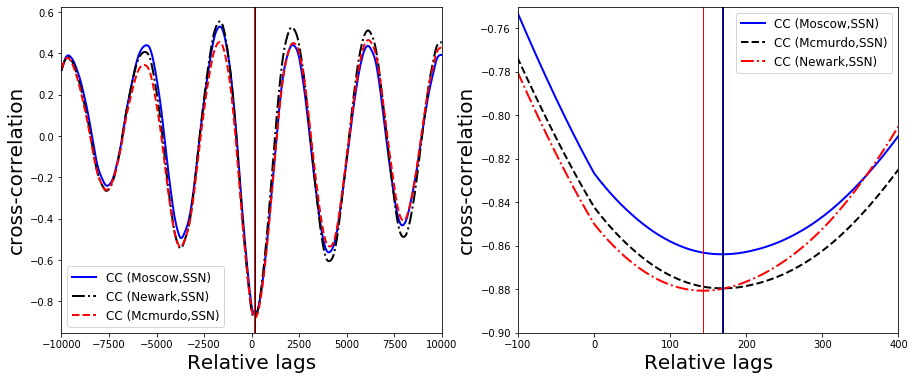

In [15]:
#representación grafica de la correlación cruzada y se muestra el desfase para cada uno de los detectores
plt.figure(figsize=(15,6))
plt.subplot (1,2,1)
plt.plot(lags_moscow,ccor_moscow,label=r"CC (Moscow,SSN)",lw=2,color='blue')
plt.plot(lags_newark,ccor_newark,label=r"CC (Newark,SSN)",lw=2,color='k', ls = '-.')
plt.plot(lags_mcmurdo,ccor_mcmurdo,label=r"CC (Mcmurdo,SSN)",lw=2,color='r' , ls = "--")
plt.xlim(-10000,10000)
plt.axvline(lags_moscow[np.argmin(ccor_moscow)], color='Blue', linewidth=1)
plt.axvline(lags_newark[np.argmin(ccor_newark)], color='r', linewidth=1)
plt.axvline(lags_mcmurdo[np.argmin(ccor_mcmurdo)], color='k', linewidth=1)
plt.xlabel("Relative lags",fontsize=20)
plt.ylabel("cross-correlation", fontsize=20)
plt.legend(fontsize=12)

plt.subplot(1,2,2)
plt.plot(lags_moscow,ccor_moscow,label=r"CC (Moscow,SSN)",lw=2,color='blue')
plt.plot(lags_mcmurdo,ccor_mcmurdo,label=r"CC (Mcmurdo,SSN)",lw=2,color='k' , ls = "--")
plt.plot(lags_newark,ccor_newark,label=r"CC (Newark,SSN)",lw=2,color='r', ls = '-.')
plt.xlim(-100,400)
plt.ylim(-0.9,-0.75)
plt.axvline(lags_moscow[np.argmin(ccor_moscow)], color='Blue', linewidth=1)
plt.axvline(lags_newark[np.argmin(ccor_newark)], color='r', linewidth=1)
plt.axvline(lags_mcmurdo[np.argmin(ccor_mcmurdo)], color='k', linewidth=1)

plt.xlabel("Relative lags",fontsize=20)
plt.ylabel("cross-correlation", fontsize=20)
plt.legend(fontsize=12)
plt.show()